# Python for Data 22: Probability Distributions
[back to index](https://www.kaggle.com/hamelg/python-for-data-analysis-index)

Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs). When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. A [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely.

In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events. In this lesson we'll discuss some common probability distributions and how to work with them in Python.

## The Uniform Distribution

The uniform distribution (https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)) is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another. 

Many useful functions for working with probability distributions in Python are contained in the scipy.stats library. Let's load in some libraries, generate some uniform data and plot a density curve:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10

# Show the data

In [3]:
uniform_data

array([7.2439574 , 3.93314318, 4.05978204, ..., 0.56446655, 5.503036  ,
       5.31063244])

# Length of data

In [4]:
len(uniform_data)

100000

# Convert data into dataframe

In [5]:
df= pd.DataFrame(uniform_data)
df.head()

,0
0,7.243957
1,3.933143
2,4.059782
3,0.563360
4,3.565042


# Convert data into Dataframe

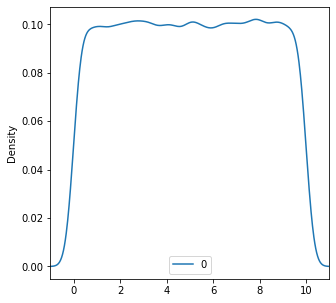

In [6]:
df.plot(kind="density",  # Plot the distribution
                               figsize=(5,5),
                               xlim=(-1,11));

*Note: the plot above is an approximation of the underlying distribution, since it is based on a sample of observations.*

In the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.

Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest:

-stats.distribution.rvs() generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).

-stats.distribution.cdf() is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function)). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [7]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check 25%
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

-stats.distribution.ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [9]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

-stats.distribution.pdf() gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [14]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

## Generating Random Numbers and Setting The Seed

When you need to generate random real numbers in a range with equal probability you can draw numbers from a uniform distribution using stats.distribution.rvs(). Python also comes with a library called "random" that lets you perform various operations that involve randomization. Let's look at a few functions in the random library:

In [12]:
import random

random.randint(0,10)     # Get a random integer in the specified range

5

In [13]:
random.choice([2,4,6,9]) # Get a random element from a sequence

9

In [14]:
random.random()          # Get a real number between 0 and 1

0.6264712302308957

In [15]:
random.uniform(0,10)     # Get a real in the specified range

6.117939599804866

Notice that the random library also lets you generate random uniform numbers. Regardless of the method you use to generate random numbers, however, the result of a random process can differ from one run to the next. Having results vary each time you run a function is often not desirable. For example, if you want a colleague to be able to reproduce your results exactly, you can run into problems when you use randomization. You can ensure that your results are the same each time you use a function that involves randomness by setting the random number generator's seed value to initialize it prior to running the function. Set the random seed with random.seed():

In [16]:
random.seed(12)  # Set the seed to an arbitrary value

print([random.uniform(0,10) for x in range(4)])

random.seed(10)  # Set the seed to the same value

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[5.714025946899135, 4.288890546751146, 5.780913011344704, 2.0609823213950174]


Notice that we generated the exact same numbers with both calls to random.uniform() because we set the same seed before each call. If we had not set the seed, we would have gotten different numbers. This reproducibility illustrates the fact that these random numbers aren't truly random, but rather "pseudorandom".

Many functions in Python's libraries that use randomness have an optional random seed argument built in so that you don't have to set the seed outside of the function. For instance, the rvs() function has an optional argument random_state, that lets you set the seed.

*Note: The Python standard library "random" has a separate internal seed from the numpy library. When using functions from numpy and libraries built on top of numpy (pandas, scipy, scikit-learn) use np.random.seed() to set the seed.*

## The Normal Distribution

The normal or [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

The scipy nickname for the normal distribution is norm. Let's investigate the normal distribution:

In [25]:
# Calculate the probability of observing a value less than or equal to -1
prob_under_minus1 = stats.norm.cdf(x=-1, loc=0, scale=1)

# Calculate the probability of observing a value less than or equal to 1
prob_above_minus1 = stats.norm.cdf(x=1, loc=0, scale=1)

# Calculate the probability of observing a value greater than 1
prob_over_1 = 1 - prob_above_minus1

# Calculate the probability of observing a value between -1 and 1
between_prob = 1 - (prob_under_minus1 + prob_over_1)

# Print the probabilities
print("Probability of observing a value less than or equal to -1:", prob_under_minus1)
print("Probability of observing a value less than or equal to 1:", prob_above_minus1)
print("Probability of observing a value greater than 1:", prob_over_1)
print("Probability of observing a value between -1 and 1:", between_prob)

Probability of observing a value less than or equal to -1: 0.15865525393145707
Probability of observing a value less than or equal to 1: 0.8413447460685429
Probability of observing a value greater than 1: 0.15865525393145707
Probability of observing a value between -1 and 1: 0.6826894921370859


The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:

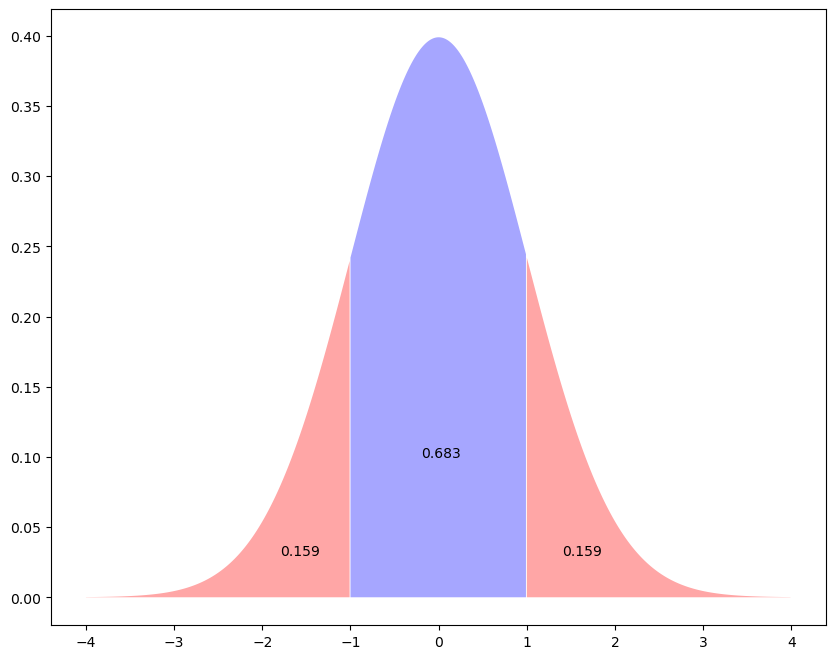

In [31]:
import numpy as np
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (10,8)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

*Note: This lesson uses some plotting code we did not cover in the plotting lesson in order to make plots for explanatory purposes.*

The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean.
Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

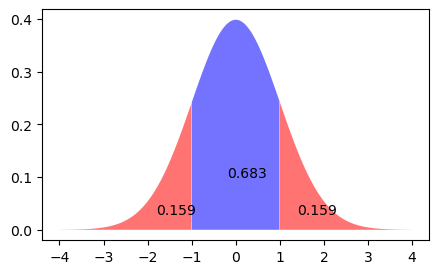

In [26]:

plt.rcParams["figure.figsize"] = (5,3)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.55)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.55)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.55)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

## The Binomial Distribution

The [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

The scipy name for the binomial is binom. Let's generate and investigate some binomial data:

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts   9  78  427  1157  2035  2478  2027  1243  441  98   7


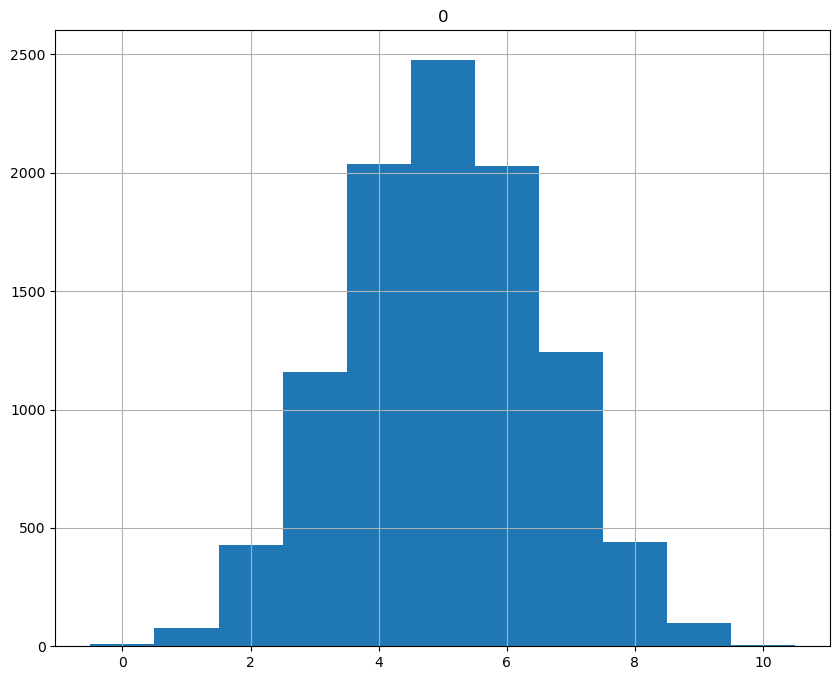

In [37]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print(pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

Note that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   8  55  292  844  2005  3034  2723  1039


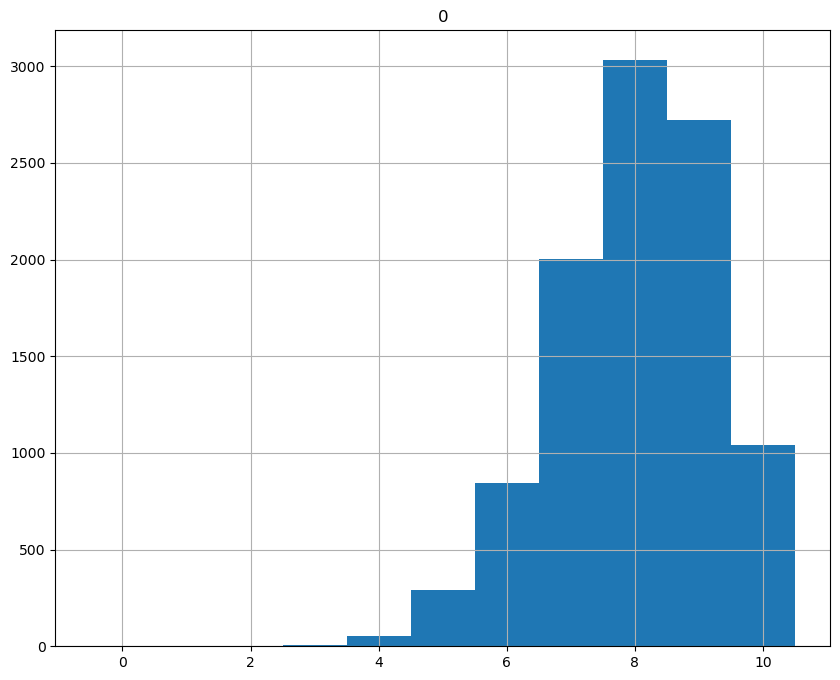

In [42]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [43]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.03279349759999997

In [44]:
1 - stats.binom.cdf(k=8,        # Probability of k = 8 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000015

For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:

In [45]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000003

In [46]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.30198988799999993

## The Poisson Distribution

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

The scipy name for the Poisson distribution is "poisson". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1 per time unit:

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3615  3674  1866  630  175  36  4


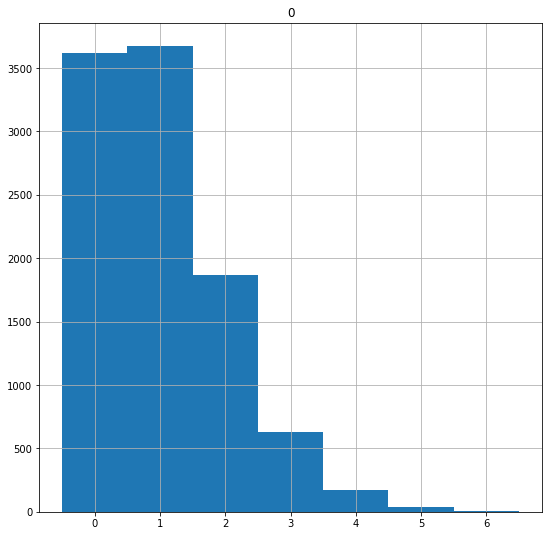

In [26]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

col_0   0   1   2   3    4    5    6    7  ...   16   17  18  19  20  21  22  24
row_0                                      ...                                  
counts   1   4  23  61  198  379  609  838 ...  211  149  91  42  22   6   4   2

[1 rows x 24 columns]


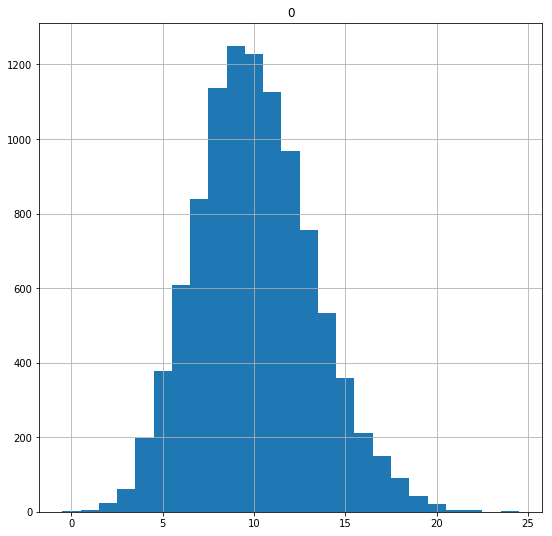

In [27]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data (rvs function that generates random numbers)
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:

In [47]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [48]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

In [5]:
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
   

n = 20 #num of coin flips for each trial
p = 0.50 #probability of success (head) -- let's say it is a fair coin
size = 25 #number of the trials I want to do -- so I want 25 20 coin flips  

data_binom = binom.rvs(n=n, p=p, size=size)

data_binom 

array([12,  7,  8, 10,  8, 14, 10, 12,  8,  9, 13, 10, 13, 12,  8, 11, 10,
       13, 11,  8, 12, 12,  9, 11, 10], dtype=int64)

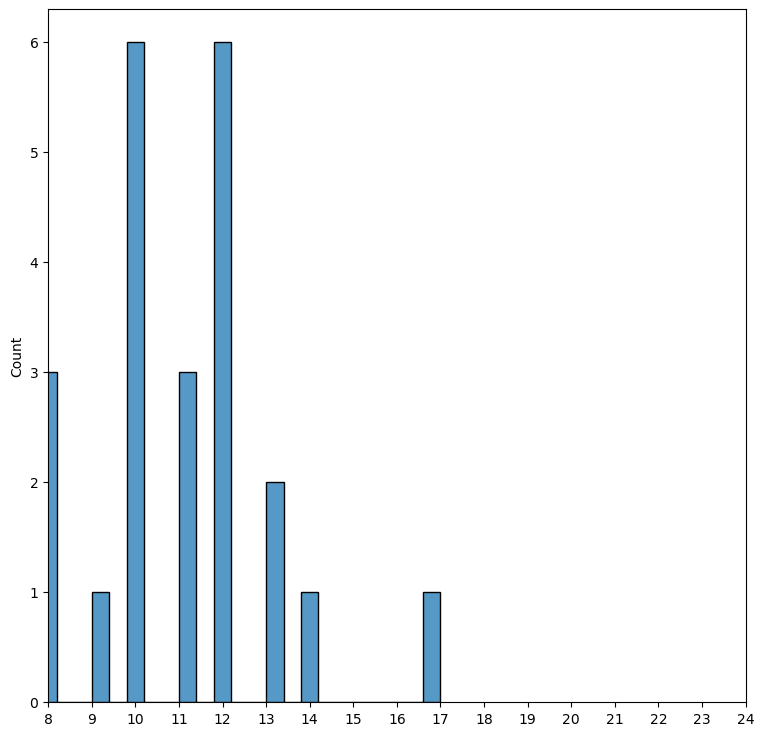

In [27]:
#Tie it back with the output above!

fig, ax = plt.subplots()

sns.histplot(data_binom, ax = ax, bins=25)
ax.set_xlim(8,24)
ax.set_xticks(range(8,25))
plt.show()

# Lab Task

In [1]:
#Perform all above given tasks on the given dataset(King.csv) , show all probabilities

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [15]:
df=pd.read_csv('C:\\Users\\hinaa\\Downloads\\king_county (1).csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0


In [16]:
len(df)

21613

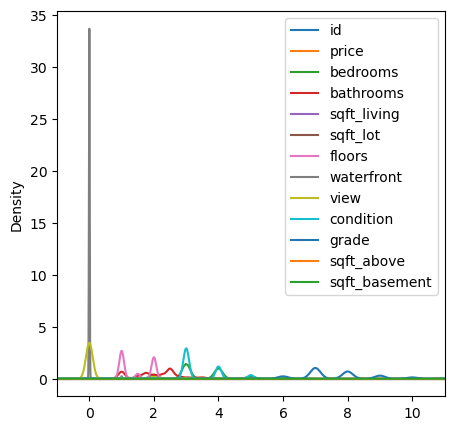

In [17]:
df.plot(kind="density",  # Plot the distribution
figsize=(5,5),
xlim=(-1,11));



In [20]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check 25%
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

In [21]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)  

4.0

In [22]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


In [23]:
# Calculate the probability of observing a value less than or equal to -1
prob_under_minus1 = stats.norm.cdf(x=-1, loc=0, scale=1)

# Calculate the probability of observing a value less than or equal to 1
prob_above_minus1 = stats.norm.cdf(x=1, loc=0, scale=1)

# Calculate the probability of observing a value greater than 1
prob_over_1 = 1 - prob_above_minus1

# Calculate the probability of observing a value between -1 and 1
between_prob = 1 - (prob_under_minus1 + prob_over_1)

# Print the probabilities
print("Probability of observing a value less than or equal to -1:", prob_under_minus1)
print("Probability of observing a value less than or equal to 1:", prob_above_minus1)
print("Probability of observing a value greater than 1:", prob_over_1)
print("Probability of observing a value between -1 and 1:", between_prob)

Probability of observing a value less than or equal to -1: 0.15865525393145707
Probability of observing a value less than or equal to 1: 0.8413447460685429
Probability of observing a value greater than 1: 0.15865525393145707
Probability of observing a value between -1 and 1: 0.6826894921370859


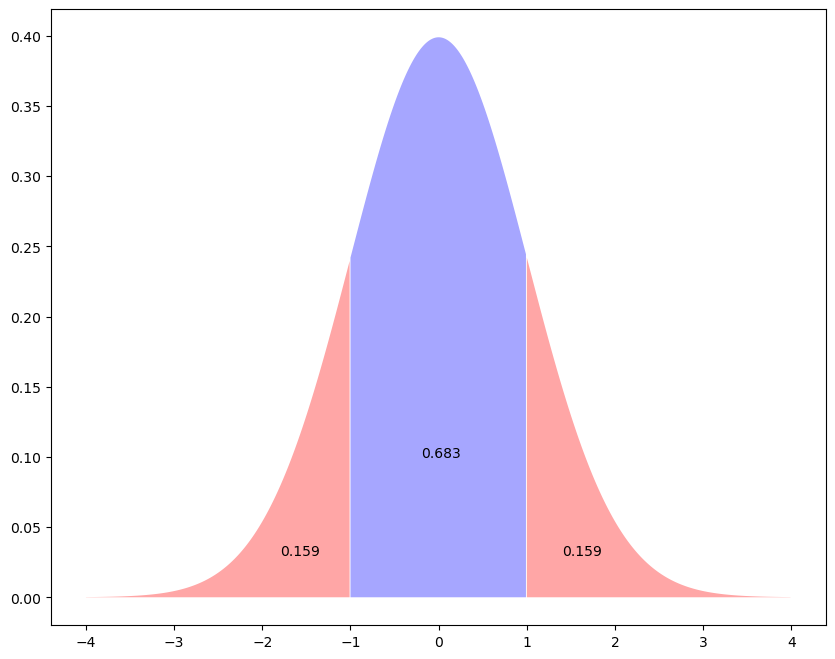

In [24]:
import numpy as np
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (10,8)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

In [28]:
fair_coin_flips = stats.binom.rvs(n=10, )  # Number of trials

print(pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

ValueError: Data must be 1-dimensional